Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven day  period ,  identify  which  factors  predict  future  user
adoption .


## Sourcing and Loading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### Users

In [2]:
users = pd.read_csv('takehome_users.csv')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [6]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [7]:
users.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

## engagement

In [8]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [9]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [10]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
engagement.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [12]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [13]:
engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

## Data Wrangling

In [14]:
import datetime

In [15]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['creation_time'])

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 937.6+ KB


In [17]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [18]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [19]:
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted'

In [20]:
adopted.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: adopted, dtype: bool

In [21]:
print("Total number of engaged users: {}".format(len(adopted)))
print("Total number of adopted users: {}".format(sum(adopted)))

Total number of engaged users: 8823
Total number of adopted users: 1656


In [22]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], format='%Y-%m-%d %H:%M:%S')

In [23]:
# Creating a feature
users['length'] = users['last_session_creation_time'] - users['creation_time']
users['length'] = users['length'].dt.days

In [24]:
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          12000 non-null  float64
 8   length                      12000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 843.9+ KB


In [26]:
# merge user data and "adopted user" variable
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted], axis=1, join='inner')
data['adopted'] = data['adopted'].astype(int)

In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        8823 non-null   object 
 1   email                       8823 non-null   object 
 2   creation_source             8823 non-null   object 
 3   opted_in_to_mailing_list    8823 non-null   int64  
 4   enabled_for_marketing_drip  8823 non-null   int64  
 5   org_id                      8823 non-null   int64  
 6   invited_by_user_id          8823 non-null   float64
 7   length                      8823 non-null   int64  
 8   adopted                     8823 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 654.8+ KB


# Modeling

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
from sklearn.model_selection import train_test_split
# make dummy variable for creation source
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopted']
X = model_data.drop('adopted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state=42)

In [30]:
names_list = ['name', 'email']
names_train = X_train[names_list]
names_test = X_test[names_train]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((7058, 9), (1765, 9))

In [31]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
clf_params = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

grid_clf = GridSearchCV(RandomForestClassifier(), clf_params)
grid_clf.fit(X_train, y_train)
y_pred_gclf = grid_clf.predict(X_test)
test_gclf = accuracy_score(y_pred_gclf, y_test)


print("Tuned CLF Parameter: {}".format(grid_clf.best_params_))
print("Best score is {}".format(grid_clf.best_score_))

Tuned CLF Parameter: {'max_features': 'auto', 'n_estimators': 200, 'oob_score': False}
Best score is 0.9600459160421055


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
best_model = RandomForestClassifier(n_estimators=20, max_features=5, oob_score=True)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [34]:
# Generate classification report
print(classification_report(y_test, y_pred))
print("Accuracy is {}".format(test_gclf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1417
           1       0.92      0.86      0.89       348

    accuracy                           0.96      1765
   macro avg       0.94      0.92      0.93      1765
weighted avg       0.96      0.96      0.96      1765

Accuracy is 0.9592067988668556


Text(0.5, 1.0, 'ROC Curve')

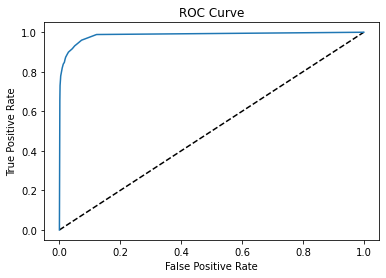

In [35]:
# Compute predicted probabilities
y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [36]:
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9852


In [37]:
important_variables = pd.DataFrame(list(zip(X.columns, best_model.feature_importances_)), columns = ['features', 'Importance'])
important_variables.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
4,org_id,0.873367
2,opted_in_to_mailing_list,0.063139
3,enabled_for_marketing_drip,0.037287
0,name,0.006223
5,invited_by_user_id,0.005266
1,email,0.004450
8,PERSONAL_PROJECTS,0.003846
7,ORG_INVITE,0.003322
6,length,0.003101


The most important features for determining adoption is org_id.